## Handwritten digits classification using neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Number of data in 'X_train':", len(X_train))
print("Number of data in 'X_test':", len(X_test))

Number of data in 'X_train': 60000
Number of data in 'X_test': 10000


In [4]:
#Shape
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

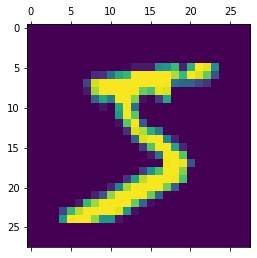

In [6]:
#lets check out the image
plt.matshow(X_train[0])

In [7]:
#verification
y_train[0]

5

In [8]:
#since this is an image lets flatten it out for our model
X_train.shape

(60000, 28, 28)

In [19]:
#scalling
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train_flattened = X_train.reshape(X_train.shape[0],X_train.shape[1] * X_train.shape[2])
X_test_flattened = X_test.reshape(X_test.shape[0],X_test.shape[1] * X_test.shape[2])

In [21]:
X_train_flattened.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 2.0372 - accuracy: 0.4161
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 1.4441 - accuracy: 0.5033
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 1.3595 - accuracy: 0.5659
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 1.2890 - accuracy: 0.6320
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 1.2154 - accuracy: 0.6654


We can observe the accuracy to be very low, usual suspection is that we should have done feature scaling.

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 2.2417 - accuracy: 0.5692
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 2.0924 - accuracy: 0.7466
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 1.9021 - accuracy: 0.7726
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 1.7136 - accuracy: 0.7819
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 1.5503 - accuracy: 0.7894


In [23]:
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 1.4636 - accuracy: 0.8055


[1.4635841327667236, 0.8055]

In [25]:
y_predicted = model.predict(X_test_flattened)

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [28]:
y_predicted_labels[0]

7

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 917,    1,    4,   10,    0,    4,   35,    1,    7,    1],
       [   0, 1105,    7,    5,    0,    1,    3,    0,   14,    0],
       [  22,   65,  790,   48,   18,    0,   29,   21,   38,    1],
       [   7,   34,   26,  877,    1,    2,    6,   21,   25,   11],
       [   2,   42,    3,    0,  758,    0,   27,    3,    4,  143],
       [  36,  100,    5,  215,   29,  392,   26,   29,   25,   35],
       [  28,   44,    8,    0,   12,   10,  855,    0,    1,    0],
       [   2,   68,   14,    3,   10,    0,    2,  885,    7,   37],
       [  25,   77,   10,  102,   11,    4,   16,   21,  673,   35],
       [  22,   37,    6,   13,   65,    0,    1,   56,    6,  803]])>

In [31]:
!pip install seaborn

Text(69.0, 0.5, 'Truth')

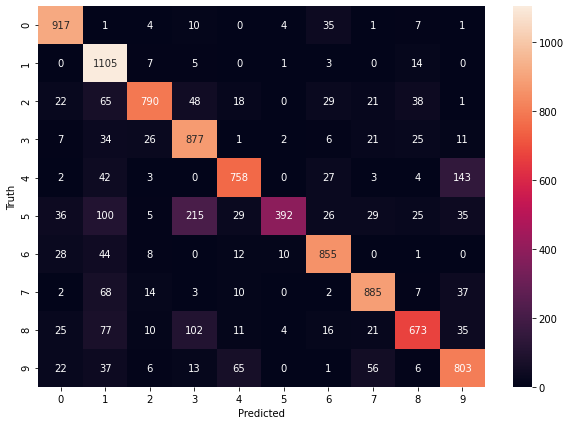

In [32]:
#seaborn

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

great confusion between 2 and 8 , lets add one more layer to it

In [36]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 1.2816 - accuracy: 0.6965
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5601 - accuracy: 0.8631
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4270 - accuracy: 0.8871
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3738 - accuracy: 0.8973
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3461 - accuracy: 0.9037
